# HR_Analytics_Dataset

### Hypothesis
### Employees with lower job satisfaction are more likely to leave the company.

In [95]:
# install necessary packages
%pip install numpy matplotlib seaborn scikit-learn

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd

# load dataset
df = pd.read_csv('data/cleaned.csv')

In [97]:
df.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


In [98]:
df.describe()

,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,2.974692,2.941652,3.028471,2.989104,2.973989,559.278956,49.448506
std,859.450107,1.012610,1.435230,1.410067,1.408816,1.419682,263.333611,17.689179
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.040000,17.000000
25%,1736.000000,2.000000,2.000000,2.000000,2.000000,2.000000,328.060000,34.000000
50%,2456.000000,3.000000,3.000000,3.000000,3.000000,3.000000,571.810000,49.000000
75%,3197.000000,3.000000,4.000000,4.000000,4.000000,4.000000,788.330000,65.000000
max,4000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,999.970000,82.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc                    2845 

In [100]:
# check for missing values
print(df.isnull().sum())


Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64


### Correlation between numerical features (heatmap) Shows the correlations between numerical variables (e.g. engagement score, satisfaction, work-life balance).
### Result: We can see which variables are most strongly correlated.



C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\3062968915.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\3062968915.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Survey Date'] = pd.to_datetime(df['Survey Date'], errors='coerce')
C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\3062968915.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Training Date'] = pd.to_datetime(df['Training Date'], errors='coerce')


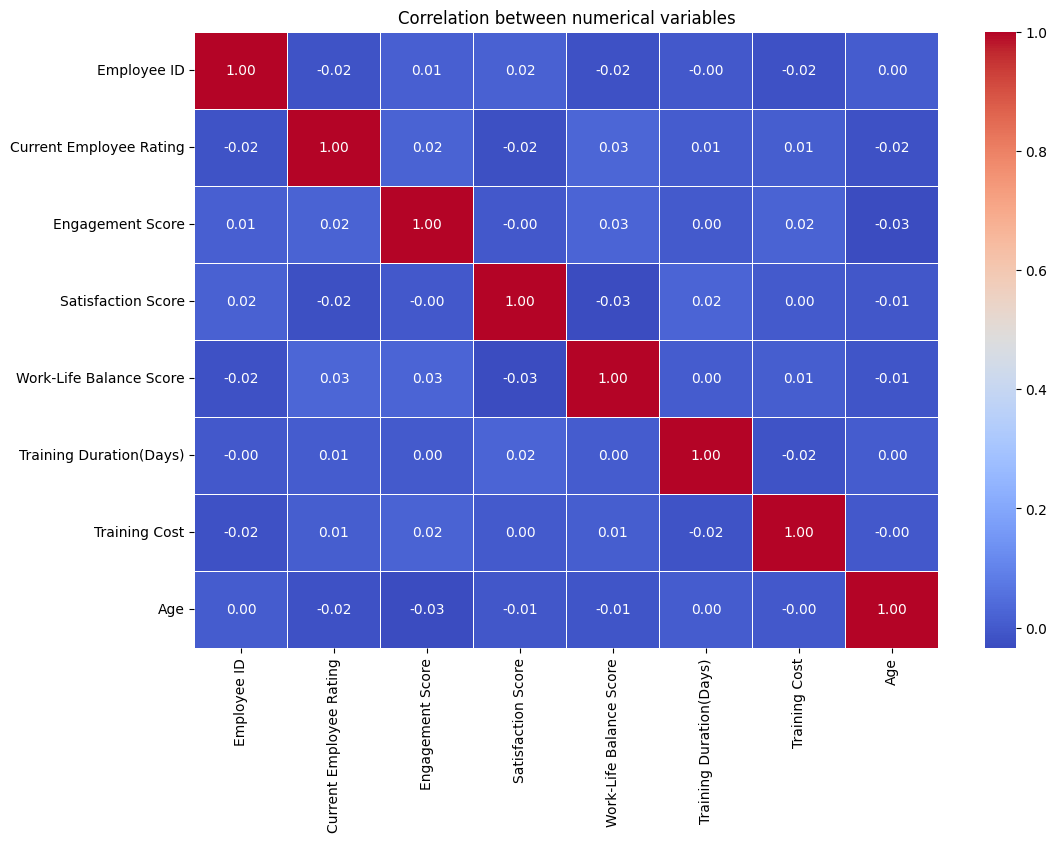

In [101]:
# Convert date columns to datetime format
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Survey Date'] = pd.to_datetime(df['Survey Date'], errors='coerce')
df['Training Date'] = pd.to_datetime(df['Training Date'], errors='coerce')

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between numerical variables")
plt.show()


### Distribution of employee satisfaction (histogram)
### Shows how employee satisfaction is distributed.
### Result: Shows whether most employees are satisfied or dissatisfied.


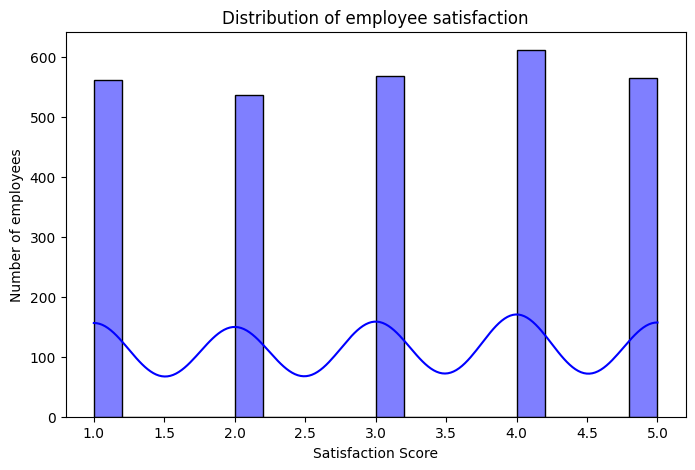

In [102]:
plt.figure(figsize=(8,5))
sns.histplot(df["Satisfaction Score"], bins=20, kde=True, color="blue")
plt.title("Distribution of employee satisfaction")
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of employees")
plt.show()


### Boxplot für Work-Life-Balance vs. Performance Score
### Helps to see if work-life balance has an impact on performance.
### Result: Shows whether employees with a better work-life balance also have a better performance.

C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\2551802372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Work-Life Balance Score"], y=df["Performance Score"], palette="Set2")


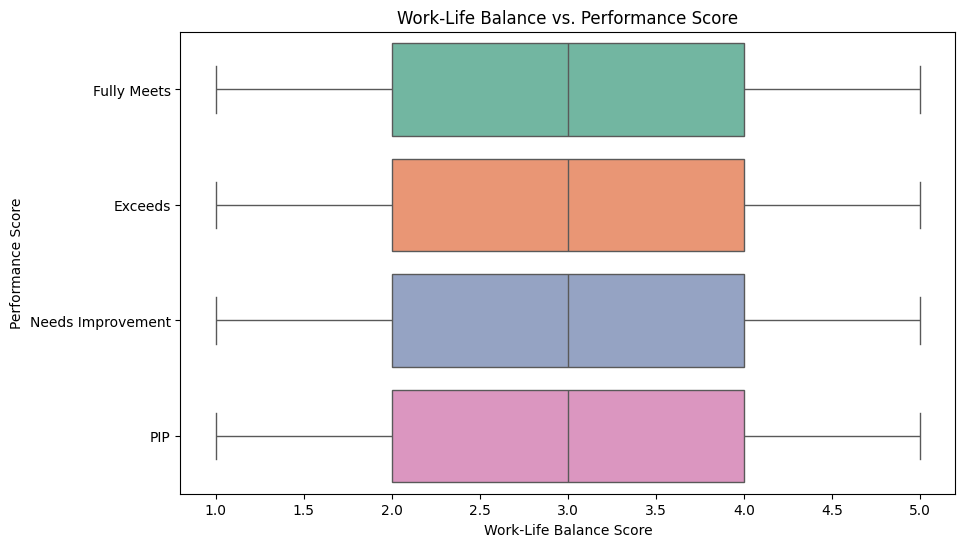

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Work-Life Balance Score"], y=df["Performance Score"], palette="Set2")
plt.title("Work-Life Balance vs. Performance Score")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Performance Score")
plt.show()


### Employee distribution by department (bar plot) 
### Shows how many employees work in each department.
### Result: Shows which departments have the most/fewest employees.


C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\411132625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["DepartmentType"], palette="viridis")


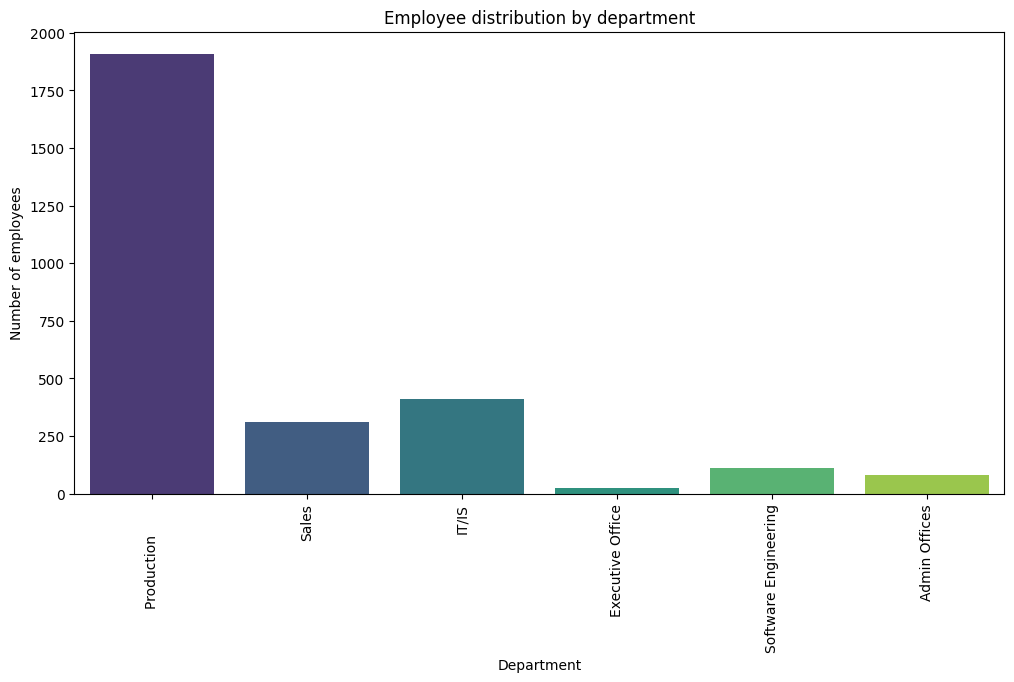

In [104]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["DepartmentType"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Employee distribution by department")
plt.xlabel("Department")
plt.ylabel("Number of employees")
plt.show()


<h3>Cancellation rate per department (if EmployeeStatus is available)
Shows in which departments most employees resign.
Result: Shows which departments have the highest churn rate.</h3>

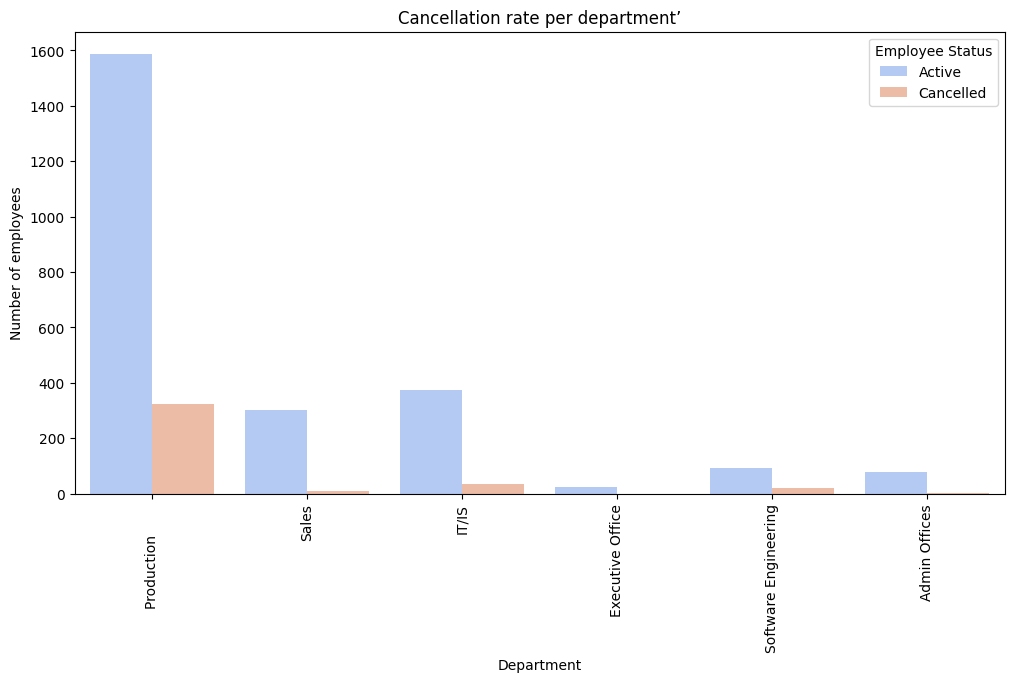

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["DepartmentType"], hue=df["EmployeeStatus"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Cancellation rate per department’")
plt.xlabel("Department")
plt.ylabel("Number of employees")
plt.legend(title="Employee Status", labels=["Active", "Cancelled"])
plt.show()


### Scatterplot für Engagement Score vs. Satisfaction Score
### Helps to see whether committed employees are also more satisfied.
### Result: Shows whether satisfied employees are also more committed.

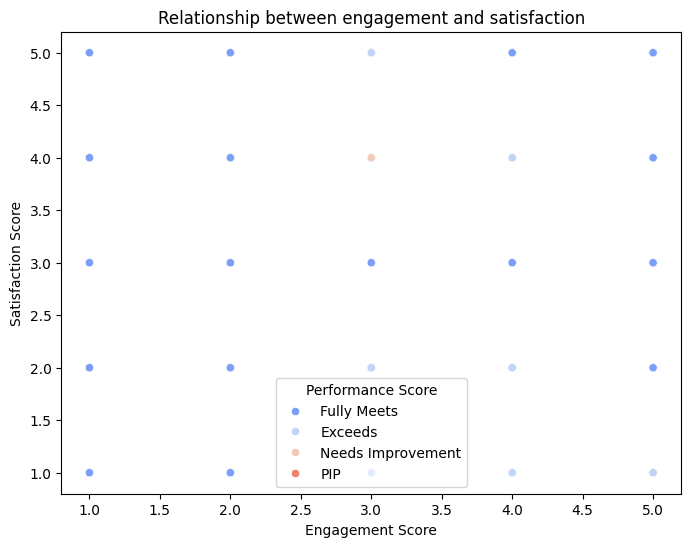

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Engagement Score"], y=df["Satisfaction Score"], hue=df["Performance Score"], palette="coolwarm")
plt.title("Relationship between engagement and satisfaction")
plt.xlabel("Engagement Score")
plt.ylabel("Satisfaction Score")
plt.show()


### 1️⃣ Prepare data
✅ Set target variable (y):
If EmployeeStatus is the target variable:

In [107]:
df["EmployeeStatus"] = df["EmployeeStatus"].apply(lambda x: 1 if x == "Terminated" else 0)


### ✅ Convert categorical variables:

In [108]:
df_encoded = pd.get_dummies(df, drop_first=True)


### ✅ Separate features (X) and target variable (y):

In [109]:
X = df_encoded.drop(columns=["EmployeeStatus"])
y = df_encoded["EmployeeStatus"]


### Train model
✅ Split training and test data:

In [110]:
print(df.dtypes[df.dtypes == 'datetime64[ns]'])


StartDate        datetime64[ns]
DOB              datetime64[ns]
Survey Date      datetime64[ns]
Training Date    datetime64[ns]
dtype: object


In [111]:
reference_date = pd.to_datetime("today")  # Today's date as reference
df["StartDate_Days"] = (reference_date - df["StartDate"]).dt.days
df["DOB_Days"] = (reference_date - df["DOB"]).dt.days
df["SurveyDate_Days"] = (reference_date - df["Survey Date"]).dt.days
df["TrainingDate_Days"] = (reference_date - df["Training Date"]).dt.days


In [112]:
print(X_train.dtypes)


Employee ID                               int64
Current Employee Rating                   int64
Engagement Score                          int64
Satisfaction Score                        int64
Work-Life Balance Score                   int64
                                          ...  
Training Program Name_Technical Skills     bool
Training Type_Internal                     bool
Training Outcome_Failed                    bool
Training Outcome_Incomplete                bool
Training Outcome_Passed                    bool
Length: 133, dtype: object


In [113]:
# Remove the original datetime64 columns
df.drop(columns=["StartDate", "DOB", "Survey Date", "Training Date"], inplace=True, errors="ignore")


In [114]:
df = pd.get_dummies(df, drop_first=True)


In [115]:
print(df.columns)  # Shows all available columns


Index(['Employee ID', 'EmployeeStatus', 'Current Employee Rating',
       'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'Training Duration(Days)', 'Training Cost', 'Age', 'StartDate_Days',
       ...
       'Performance Score_Needs Improvement', 'Performance Score_PIP',
       'Training Program Name_Customer Service',
       'Training Program Name_Leadership Development',
       'Training Program Name_Project Management',
       'Training Program Name_Technical Skills', 'Training Type_Internal',
       'Training Outcome_Failed', 'Training Outcome_Incomplete',
       'Training Outcome_Passed'],
      dtype='object', length=134)


In [116]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [117]:
from sklearn.preprocessing import LabelEncoder

# List of columns that exist AND have object type
label_cols = ["EmployeeType", "PayZone", "State"]  # If these still exist
existing_label_cols = [col for col in label_cols if col in df.columns]

le = LabelEncoder()
for col in existing_label_cols:
    df[col] = le.fit_transform(df[col])


In [118]:
print(df.dtypes[df.dtypes == 'object'])


Series([], dtype: object)


In [119]:
print(df.columns)


Index(['Employee ID', 'EmployeeStatus', 'Current Employee Rating',
       'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'Training Duration(Days)', 'Training Cost', 'Age', 'StartDate_Days',
       ...
       'Performance Score_Needs Improvement', 'Performance Score_PIP',
       'Training Program Name_Customer Service',
       'Training Program Name_Leadership Development',
       'Training Program Name_Project Management',
       'Training Program Name_Technical Skills', 'Training Type_Internal',
       'Training Outcome_Failed', 'Training Outcome_Incomplete',
       'Training Outcome_Passed'],
      dtype='object', length=134)


In [120]:
print([col for col in df.columns if "status" in col.lower()])


['EmployeeStatus']


In [121]:
df_original = pd.read_csv("data/cleaned.csv")   # Replace with your file name
print(df_original.columns)


Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')


In [122]:
y = df["EmployeeStatus_Terminated"]
X = df.drop(columns=["EmployeeStatus_Terminated"])





KeyError: 'EmployeeStatus_Terminated'

### Train the Model
### RandomForestClassifier
### This code trains a Random Forest model to predict whether an employee will leave (EmployeeStatus_Terminated). It splits the data into training (80%) and testing (20%), balances class weights, and fits 100 decision trees to learn patterns in employee behavior.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define Features (X) and Target (y)
X = df.drop(columns=["EmployeeStatus_Terminated"])  
y = df["EmployeeStatus_Terminated"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\48053043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_top["Importance"], y=importance_df_top["Feature"], palette="coolwarm")


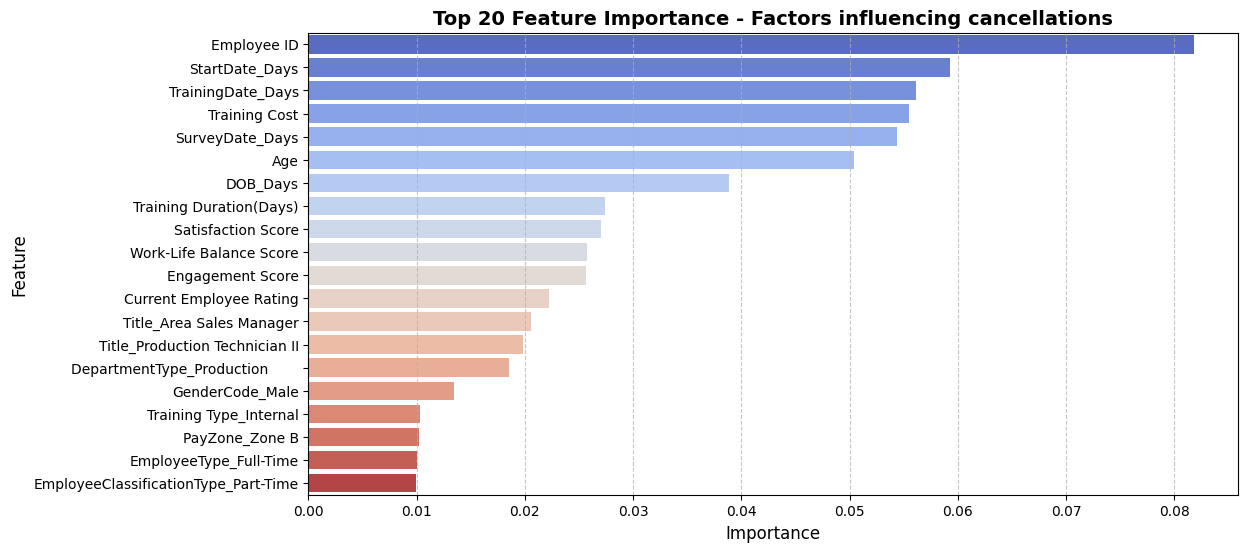

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Show only the Top 20 Features for better readability
top_n = 20
importance_df_top = importance_df.head(top_n)

# Improved Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df_top["Importance"], y=importance_df_top["Feature"], palette="coolwarm")
plt.title("Top 20 Feature Importance - Factors influencing cancellations", fontsize=14, fontweight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



In [ ]:
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("data/cleaned.csv")

# Check if EmployeeStatus_Terminated exists
print(df.columns)


Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')


In [ ]:
df["EmployeeStatus"] = df["EmployeeStatus"].apply(lambda x: 1 if x == "Terminated" else 0)


In [ ]:
import pandas as pd

# Dataset erneut laden (ersetze 'your_dataset.csv' mit deinem Dateinamen)
df = pd.read_csv("data/cleaned.csv")

# Überprüfen, ob EmployeeStatus existiert
print(df.columns)


Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')


In [ ]:
df["EmployeeStatus"] = df["EmployeeStatus"].apply(lambda x: 1 if x == "Terminated" else 0)
print(df.columns)

Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')


### Analyse

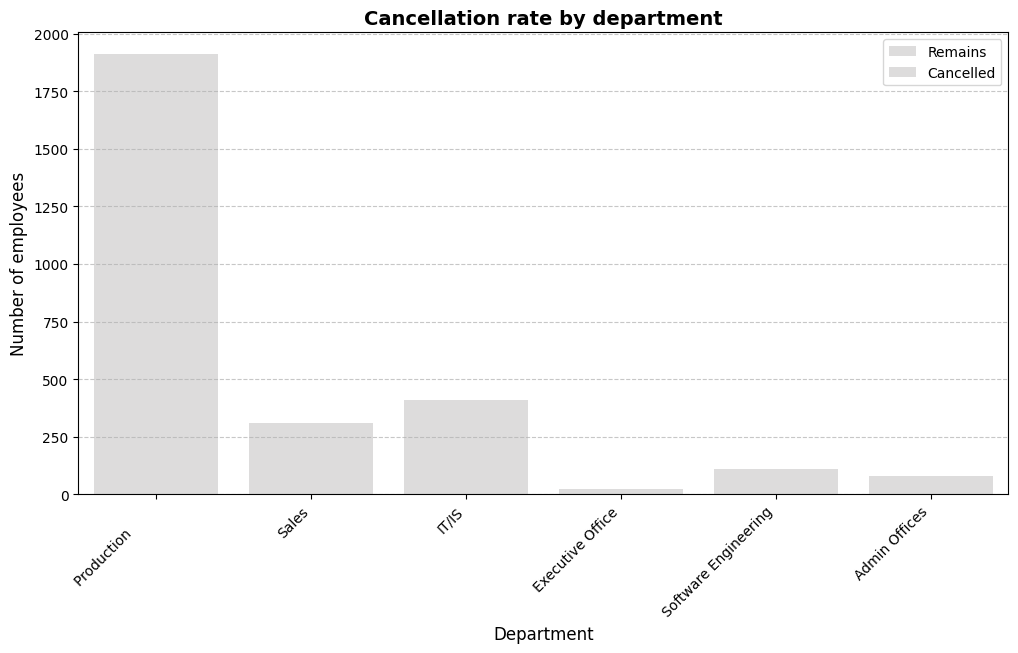

C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\4200469834.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["EmployeeStatus"], y=df["Engagement Score"], palette="coolwarm")


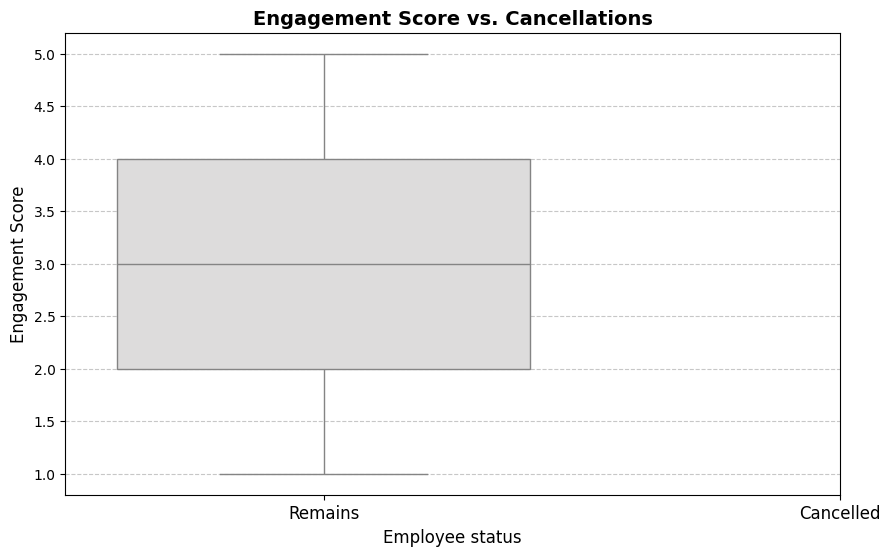

C:\Users\gulca\AppData\Local\Temp\ipykernel_19520\4200469834.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["EmployeeStatus"], y=df["Work-Life Balance Score"], palette="coolwarm")


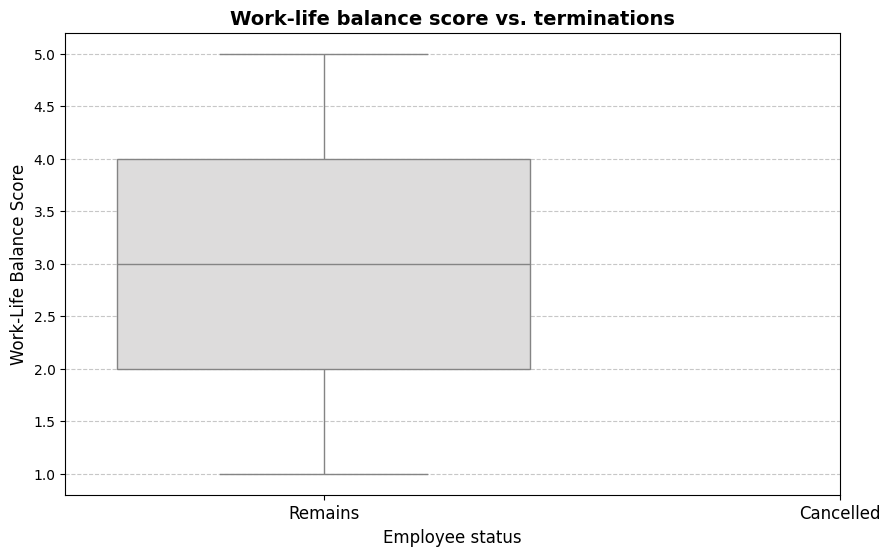

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that EmployeeStatus exists and is in binary form
if "EmployeeStatus" in df.columns and df["EmployeeStatus"].dtype != "int":
    df["EmployeeStatus"] = df["EmployeeStatus"].apply(lambda x: 1 if x == "Terminated" else 0)

# Visualise termination rate by department
if "DepartmentType" in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x=df["DepartmentType"], hue=df["EmployeeStatus"], palette="coolwarm")
    plt.xticks(rotation=45, ha="right")
    plt.title("Cancellation rate by department", fontsize=14, fontweight="bold")
    plt.xlabel("Department", fontsize=12)
    plt.ylabel("Number of employees", fontsize=12)
    plt.legend(["Remains", "Cancelled"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Influence of engagement score on cancellations
if "Engagement Score" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df["EmployeeStatus"], y=df["Engagement Score"], palette="coolwarm")
    plt.xticks([0, 1], ["Remains", "Cancelled"], fontsize=12)
    plt.title("Engagement Score vs. Cancellations", fontsize=14, fontweight="bold")
    plt.xlabel("Employee status", fontsize=12)
    plt.ylabel("Engagement Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Influence of work-life balance score on terminations
if "Work-Life Balance Score" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df["EmployeeStatus"], y=df["Work-Life Balance Score"], palette="coolwarm")
    plt.xticks([0, 1], ["Remains", "Cancelled"], fontsize=12)
    plt.title("Work-life balance score vs. terminations", fontsize=14, fontweight="bold")
    plt.xlabel("Employee status", fontsize=12)
    plt.ylabel("Work-Life Balance Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


### After analyzing the employee attrition patterns, we can draw the following key insights:

### 1️⃣ Departments with High Turnover: Certain departments have a significantly higher attrition rate, indicating potential management or workload issues.
### 2️⃣ Engagement & Satisfaction Matter: Employees with lower engagement and satisfaction scores are more likely to leave, emphasizing the need for retention strategies.
### 3️⃣ Work-Life Balance Impact: A poor work-life balance correlates with higher attrition, suggesting that flexible work policies could improve retention.

### Conclusion: By addressing these factors, HR can develop targeted strategies to reduce turnover and improve employee satisfaction.